Loading image: /home/dabe/Projects/HSLU/S4/ROBO/DUCKIE/Labyrinth/images/x_close.png
Image loaded successfully.
Displaying the resulting white mask (BGR Filter)...


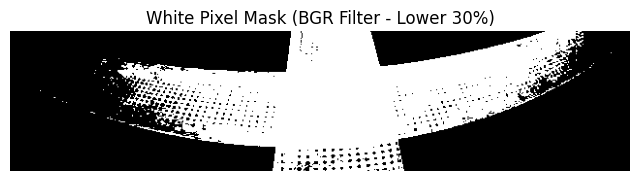

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Configuration ---
image_filename = 'images/x_close.png' # Path to your image
bottom_percentage = 30 # Analyze lower 30%
lower_color_bound = 130

# --- !!! RGB/BGR Thresholds !!! ---
# Remember OpenCV uses BGR order: [Blue, Green, Red]
# These values are VERY sensitive to lighting. Start high.
lower_bgr_white = np.array([lower_color_bound, lower_color_bound, lower_color_bound]) # Minimum B, G, R values
upper_bgr_white = np.array([255, 255, 255]) # Maximum B, G, R values

# --- Image Loading ---
image_path = os.path.abspath(image_filename)
print(f"Loading image: {image_path}")
original_image_bgr = cv2.imread(image_path)

# --- Image Processing ---
if original_image_bgr is None:
    print(f"Error: Could not load image '{image_filename}'. Check path and file.")
else:
    print("Image loaded successfully.")
    height, width, _ = original_image_bgr.shape

    # Calculate crop region
    crop_height_pixels = int(height * (bottom_percentage / 100.0))
    start_row = height - crop_height_pixels

    # Crop image to lower region
    lower_region_bgr = original_image_bgr[start_row:height, :]

    # --- !!! Create White Mask using BGR !!! ---
    # Apply inRange directly to the BGR cropped image
    white_mask = cv2.inRange(lower_region_bgr, lower_bgr_white, upper_bgr_white)

    # --- Display Result ---
    print("Displaying the resulting white mask (BGR Filter)...")
    plt.figure(figsize=(8, 6)) # Adjust size as needed
    plt.imshow(white_mask, cmap='gray')
    plt.title(f"White Pixel Mask (BGR Filter - Lower {bottom_percentage}%)")
    plt.axis('off')
    plt.show()

